<a href="https://colab.research.google.com/github/ZarevichMikhail/DM-manual/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D0%B8%D1%87%D0%BA%D0%B0_%D0%BF%D0%BE_%D0%94%D0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Пока не готово. Нужно добавить сюда введение и список литературы. Может быть сюда ещё всю теорию по лекциям записать, не знаю, слишком много переписывать выйдет.

Литература и видео, которые показались мне интересными.

1.   Жигалова Е.Ф. Дискретная математика. / Е.Ф. Жигалова. – Томск: Эль Контент, 2014. – 98 с. Наш основной учебник

Ещё несколько интересных учебников.
2. Хаггарти Р. Дискретная математика. Это более простой и понятный учебник. Его можно использовать для первоначального знакомства ДМ.
3. Новиков Ф.А. Дискретная математика для программистов. Это уже более фундаментальный учебник.
4. Кормен. Агоритмы, построение и анализ.
4. https://www.geeksforgeeks.org/dsa/graph-types-and-applications/ - информация про графы на английском языке
5. https://www.youtube.com/playlist?list=PLcsjsqLLSfNAY-pm5c4XZQhSl1U_20itT - Лекции по дм из МГУ
6.



# Лабораторная работа №1 Генерация графа

## Цель работы


В 1 лабораторной работе требуется написать программу, которая создаёт матрицу смежности и матрицу инцидентности графа заданного типа, затем выводит рисунок графа.

Формат ввода: тип графа, количество вершин.


Формат вывода: матрица смежности и матрица инцидентности графа, рисунок графа.

## Теория

Формально, граф G — это упорядоченная пара $$G=(V,E)$$, где:

*   V — множество вершин графа.
*   E — множество рёбер. Рёбра представляют собой пары вершин из V.

Пусть $v_1$ и $v_2$ - вершины, $e_1=(v_1,v_2)$ - соединяющее их ребро. Тогда эти вершины называются **смежными**, а соответствующее ребро **инцидентно** своим вершинам. Аналогично определяется инцидентность вершин $v_1,v_2$ ребру $e_1$.


Графы можно классифицировать по различным свойствам, что позволяет выбрать наиболее подходящую модель для конкретной задачи.

*   Неориентированные и ориентированные графы (Undirected and Directed Graphs)
  *   Неориентированный граф: Ребра не имеют направления. Если существует ребро между  $(v_1,v_2)$, то cуществует и $(v_2,v_1)$. Другими словами эти пары мы считаем одинаковыми $(v_1,v_2) = (v_2,v_1)$
  *   Ориентированный граф (орграф): Каждое ребро (в этом случае его часто называют **дугой**) имеет направление от одной вершины к другой. Если есть дуга  $(v_1,v_2)$, это не означает наличие  $(v_2,v_1)$.


*  Взвешенные и невзвешенные графы (Weighted and Unweighted Graphs)
  *   Невзвешенный граф: Все ребра считаются равнозначными.
  *   Взвешенный граф: Каждому ребру присваивается числовое значение, называемое весом. Вес может представлять расстояние, стоимость, время, пропускную способность или любую другую характеристику.


*   Простые графы, мультиграфы и псевдографы
  *   Простой граф: Граф, в котором между любой парой вершин существует не более одного ребра, и отсутствуют петли(ребра, соединяющие вершину саму с собой).
  *   Мультиграф: Граф, в котором допускаются кратные (параллельные) ребра — несколько ребер, соединяющих одну и ту же пару вершин. Во множестве $V$ содержатся несколько одинаковых элементов $(v_1,v_2)$.
  *   Псевдограф: Граф в котором допускаются петли. Во множестве $V$ содержатся элементы $(v_1,v_1)$.


*   Новый пункт





Известны различные способы представления графов в памяти компьютера, кторые различаются объёмом занимаемой памяти и скоростью выполнения операций над графами. Представление выбирается, исходя из потребностей конкретной задачи.  Рассмотрим два способа: матрицу смежности и матрицу инцидентности.


Строки и столбцы в матрице смежности обозначают вершины графа. Заполняется матрица следующим образом.

$$M_{ij} =
\begin{cases}
n, & \text{если } x_i \text{ соединена с вершиной } x_j \text{ n рёбрами} \\
0, & \text{если вершины } x_i \text{и } x_j  \text{ не смежны }
\end{cases}$$


Строки в матрице инцидентности обозначают вершины графа, а столбцы – рёбра.

$$B_{i,j}=
\begin{cases}
1, & \text{если ребро } u_j \text{ инцидентно вершине } x_i \\
2, & \text{если ребро } u_j \text{ - петля в вершине } x_i \\
0, & \text{если ребро } u_j \text{ не инцидентно вершине } x_i.
\end{cases}$$

Пример.


Граф. На рёбрах обозначены их номера для сопоставления с матрицей инцидентности.


![](https://raw.githubusercontent.com/ZarevichMikhail/DM-manual/refs/heads/main/Рис%201.1%20Пример%20графа.png)



```
Матрица смежности
[1, 1, 0, 0, 0]
[1, 0, 1, 1, 1]
[0, 1, 0, 0, 1]
[0, 1, 0, 0, 0]
[0, 1, 1, 0, 0]
Матрица инцидентности
[2, 1, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1]

```


## Рекомендации по выполнению работы

### Структура программы и оформление кода.

Программа должна иметь следующую структуру.

In [ ]:
import numpy as np  # Библиотека для работы с матрицами
import matplotlib.pyplot as plt # Визуализация графов
import networkx as nx # Библиотека для работы с графами
import random
import math
from enum import Enum # библиотека для создания перечислений


# Перечисление, содержащее типы графов
class GraphTypeEnum(Enum): …

# Создание матрицы смежности
def CreateMs(nodes, type): …

# Создание матрицы инцидентности
def CreateMi(ms, nodes): …

# Вывод матриц
def MatrixOutput(mi, ms): …

# Вывод графа
def DrawGraph(ms): …

# Вывод графа с кратными рёбрами
def DrawMultiGraph(ms)
  pass


def main():
    print("""Для использования полного графа введите 1.
    Для использования обыкновенного графа введите 2.
    Для использования графа с петлями введите 3.
    Для использования графа с кратными петлями и рёбра-ми введите 4.""")
    GraphType = GraphTypeEnum(int(input("Тип графа: ")))
    NodesNumber = int(input("Введите количество рёбер: "))

    ms = CreateMs(NodesNumber, GraphType)  # Создание матрицы смежности
    mi = CreateMi(ms, NodesNumber)         # Создание матрицы инцидентности

    MatrixOutput(ms, mi)            # Вывод матриц в консоль

    if GraphType != GraphTypeEnum.Multigraph:
        DrawGraph(ms)               # Рисует граф
    else:
        DrawMultiGraph(ms)          # Рисует граф с кратными рёбрами


if __name__ == "__main__":
    main()


Поскольку программа довольно простая, не содержит других классов и целиком находится в одном файле, функцию `main()` можно не добавлять.


К каждой функции должны быть добавлены комментарии
```
# Создание матрицы смежности
def CreateMs(nodes, graph_type):
    """
    Получает на вход количество вершин и тип графа, возвращает матрицу смежности графа

    Параметры
    ----------
    nodes: Количество вершин.
    type: Тип графа.

    Возвращает
    ----------
    ms: Матрица смежности.

    См. также
    ----------
    Тут должна быть информация о каких-нибудь похожих функциях.

    Примеры
    --------
    Примеры использования функции, конструктора класса и т.д.

    """

```



Благодаря такому оформлению, этот комментарий можно будет увидеть в точке вызова функции. Это значительно упрощает разработку, так как не нужно при использовании каждой функции возвращаться к документации.

### Работа с перечислениями

Лекция Горяинова про перечисления: тут будет ссылка

Пример реализации перечисления на Python.

In [74]:
from enum import Enum # библиотека для создания перечислений

# Перечисление, содержащее типы графов
class GraphTypeEnum(Enum):
    """
    Перечисление, содержащее типы графов

    Параметры
    -------------
    1 CompleteGraph - Полный граф. Все рёбра соединены друг с другом
    2 SimpleGraph - Обыкновенный граф. Граф без петель и без кратных рёбер, полный граф - частный случай.
    3 Multigraph - граф с кратными рёбрами
    4 GraphWithLoops - граф с петлями
    """

    CompleteGraph = 1
    SimpleGraph = 2
    Multigraph = 3
    GraphWithLoops = 4

Type = GraphTypeEnum(1)

print(Type == GraphTypeEnum.CompleteGraph)


True


### Вывод графа на экран

Пример реализации функции `DrawGraph`

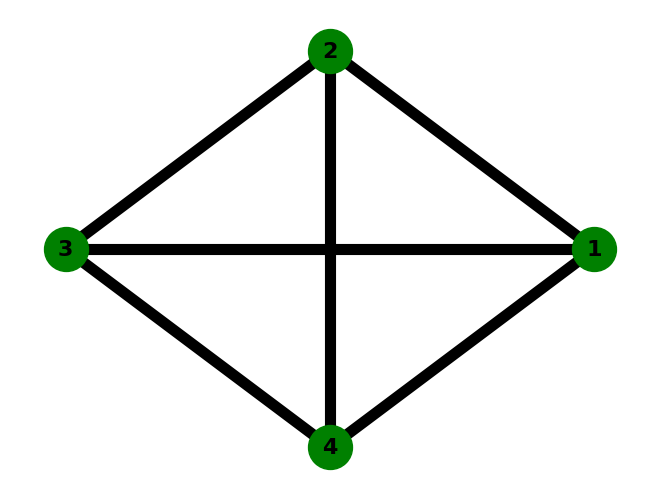

In [66]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Матрица должна быть получена в результате выполнения функции, например:
# ms = CreateMs(nodes, type)
# Матрица инцидентности, которая создаётся на основе матрицы смежности
# mi = CreateMi(ms)

# Пример полученной матрицы
ms = [[0, 1, 1, 1],
      [1, 0, 1, 1],
      [1, 1, 0, 1],
      [1, 1, 1, 0]]


# Эта часть кода должна быть в функции DrawGraph

G = nx.Graph(np.array(ms))  # Создание графа
pos = nx.circular_layout(G) # вершины располагаются так, чтобы они лежали на круге.

# Будет удобнее начать нумерацию вершин с единицы
NodeLabels = {}
for i in G.nodes():
    NodeLabels[i]= i+1

nx.draw(G, pos, node_size = 1000, width = 8, with_labels = True, labels = NodeLabels, font_size=16, font_weight = 'bold', node_color = "green")

plt.savefig("SimpleGraph.png") # Сохраняет рисунок графа в текущую директорию
plt.show()


Пример реализации функции `DrawMultiGraph`

[(0, 1, 0, 2), (0, 3, 0, 1), (1, 2, 0, 3), (1, 3, 0, 1), (2, 3, 0, 1)]


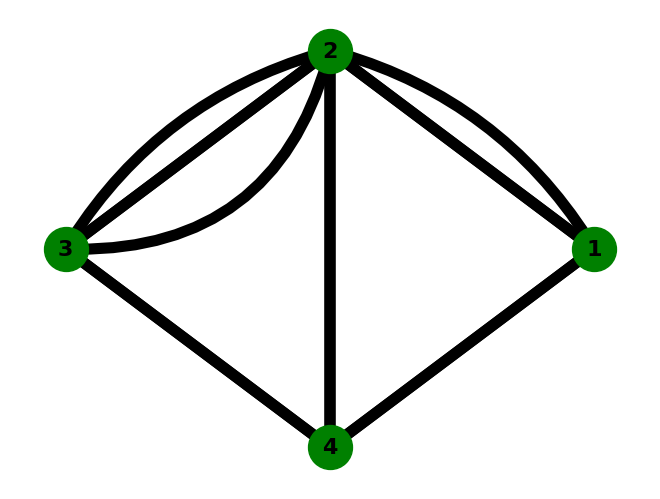

In [67]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


ms = [[0, 2, 0, 1],
      [2, 0, 3, 1],
      [0, 3, 0, 1],
      [1, 1, 1, 0]]


# Эта часть кода должна быть в функции DrawMultiGraph

# Networkx считает, что в эту функцию передаётся весовая матрица
# поэтому параметра key, который отвечает за кратные рёбра тут не будет.
G = nx.MultiGraph(np.array(ms)) # Создание графа с кратными рёбрами
pos = nx.circular_layout(G)

# Можно вывести все рёбра и увидеть, что кратные рёбра он не считает.
print(G.edges(keys = True, data='weight'))

# Чтобы у рёбер появился ключ, можно добавлять их вручную
#G.add_edge(1, 0, weight = 1)
#G.add_edge(1, 0, weight = 5)
#print(G.edges(keys = True, data='weight'))


NodeLabels = {}
for i in G.nodes():
    NodeLabels[i] = i + 1

nx.draw(G, pos, node_size = 1000, width = 8, with_labels = True, labels = NodeLabels, font_size=16, font_weight = 'bold', node_color = "green")
#nx.draw_networkx_nodes(G.nodes, pos, node_color="green", node_size=1000)
#nx.draw_networkx_labels(G, pos, NodeLabels, font_size=16, font_weight='bold')



# i,j - вершины, соединённые ребром
# key - ключ. В MultiGraph они нужны, чтобы различать кратные рёбра между собой
#       В этом случае ключей не будет, так как мы задвали граф матрицей смежности.
# weight - вес ребра. networkx считает, что в матрице смежности числа означают веса рёбер,
#         а не количество кратных рёбер.
for i, j, key, weight in G.edges(keys = True, data='weight'):
    CurrentEdge = (i, j) # текущее ребро между вершинами i j

    # Вместо key будем использовать weight
    # это число означает количество кратных рёбер
    for CurrentEdgeKey in range(weight):

        # Вычисление изгиба дуги.
        # В случае, если только одно ребро, изгиба не будет.
        # А если их несколько, то каждое следующее ребро будет изгибаться сильнее.
        rad = 0.2 * CurrentEdgeKey
        if CurrentEdgeKey % 2 == 0:
            rad = -rad # Для красоты сделал изгиб в обе стороны

        # Стиль соединения.
        ConnectionStyle = "arc3,rad="+str(rad)

        # Рисует ребро
        nx.draw_networkx_edges(G, pos, edgelist=[CurrentEdge], width=8, connectionstyle=ConnectionStyle)

plt.savefig("MultiGraph.png")
plt.show()

# Лабораторная работа №2 Метрики графа

## Теория

Для определения маршрутов длины $q$ в графе $G = (X,U)$ его матрицу смежности $R$ возводят в степень, равную $q$. Тогда для каждого значения степени $q = 1,2,...,k$ значение элемента $(r_{ij})_q$ матрицы $R_q$ определяет количество маршрутов $\mu_{ij}$ длиной, равной значению степени $q$.

---
Алгоритм заполнения матрицы метрики.

Шаг 1. Задаём матрицу метрики $M=(m_{ij})_{n \times n}$. Размерность матрицы $M$ равна размерности матрицы $R$. Все элементы $m_{ij}$ матрицы $M$ не определены.

Шаг 2. Начальное значение степени $k$ матрицы $S$ равно $\langle 1 \rangle$: $k = 1$. $\forall m_{ij}$ присваиваем значение «0».

Шаг 3. Всем элементам $m_{ij}$, значения которых не определены, присвоить значение степени $k$, если соответствующие им элементы матрицы $S^k \neq 0$. (Значения элементов $m_{ij}$ определяются только один раз.)

Шаг 4. Повышаем степень $k$ матрицы $S$: $k = k+1$.

Шаг 5. Проверяем, является ли матрица $S^{k-1}$ устойчивой.
Если матрица $S^{k-1}$ --- неустойчива, то переходим к шагу 3.
Иначе --- переходим к шагу 6.

Шаг 6. Всем элементам $m_{ij}$ матрицы $M$, значения которых остались неопределёнными, присваиваем значение $\infty$ (бесконечность).

Шаг 7. Матрица метрики $M = (m_{ij})$ построена.

Конец алгоритма.

Примечание: Элементам $\{m_{ij}\}$ значения присваиваются только один раз. Следовательно, если значение элемента $m_{ij}$ уже определено, то оно больше не меняется.

Радиус графа определяется по матрице метрики следующим способом: в каждой строке матрицы $M$ выделяется значение максимального элемента.
Наименьшее из выделенных значений --- есть величина радиуса графа.

Диаметр графа также определяется по матрице метрики $M$ следующим способом: в каждой строке матрицы $M$ выделяется значение максимального элемента.
Наибольшее из выделенных значений --- есть величина диаметра графа.

Рассмотрим проверку на устойчивое состояние. Оно возникает, когда в графе имеются изолированные вершины, в этом случае шаги 3-4 зациклятся.

Перед выполнением алгоритма следует прибавить к матрице смежности единичную матрицу. На матрицу метрики это не повлияет, но значительно упростит проверку, так как не будет влиять на положение нулей.


Если в графе есть изолированные вершины, то после того, как расстояния до неизолированных вершин будут найдены, при возведении матрицы смежности в следующую степень, положение нулей, по сравнению со старой, не изменится. Следовательно устойчивое состояние будет выполнено и нужно выходить из цикла. Радиус и диаметр в этом случае будет равен бесконечности. Все вершины будут одновременно и центральными и периферийными.


\

# Лабораторная работа №3 Раскраска графа

## Цель работы

Необходимо реализовать раскраску графа методом Магу-Вейсмана.


Формат ввода: тип графа, количество вершин.


Формат вывода: матрица смежности, матрица инцидентности, список вершин, которым нужно присвоить один цвет, хроматическое число, раскрашенный граф.

## Теория

Алгоритм Магу-Вейсмана для нахождения пустых подграфов.

1.   Построить скелет графа.
2.   Построить матрицу инцидентности графа.
3. Ввести систему логических переменных $x_1, x_2, . . ., x_i, . . ., x_n$, подчинив её условиям, вытекающим из законов булевой алгебры: $x^2_i = x_i, x_i + 1 = 1$ и т.д.
4. Составяем произведение $$P_G = \prod_{j=1}^{m} \sum_{i=1}^{n} a_{ij} x_i$$
где $a_{ij}$ – элемент матрицы инцидентности графа $G$.

5. Приводим его к дизъюнктивной нормальной форме.
В результате выполненных преобразований выражение $P_G$ будет иметь минимальную форму и представлять выражение суммы произведений переменных из множества вершин $x_1, x_2, . . ., x_i, . . ., x_n$, т. е. многочлен.

6. Для каждого слагаемого многочлена P_G выделить переменные, которые в него не входят, но входят в множество всех вершин графа. Эти переменные порождают максимальные пустые подграфы данного графа G, так как соответствующие им вершины в графе G образуют максимальные пустые подграфы.


Алгортим раскраски.



1. Упорядочить все максимальные пустые подмножества $X1, X2, X3, . . ., Xi, . . ., Xk$ графа $G$ в порядке возрастания их кардинальных чисел $∣Xi∣$.
2.   Выбрать подмножество $Xi$, имеющее наибольшее значение кардинального числа. Если таких подмножеств несколько, надо выбрать из них то, в котором сумма степеней вершин, составляющих множество, максимальна.
3. Присвоить цвет всем вершинам, входящим в множество.
4. Вычеркнуть из других подмножеств вершины, которым присвоен цвет.
5. Исключить из дальнейшего рассмотрения подмножество Xi.
6. Если семейство пустых подмножеств $X1, X2, X3, . . .Xi, . . ., Xk$ пусто, то перейти к шагу 9, иначе — к шагу 7.
7. Из оставшихся подмножеств $X1, X2, X3, . . .Xi, . . ., Xk$ аналогично пункту 2 выбрать следующее множество, и присвоить вершинам, входящим в него, цвет, который ещё не использовался.
8. Выполнять пункты 4-6 до тех пор, пока граф не будет раскрашен.
9. Посчитать количество цветов.



## Пример.
Найти раскраску вершин графа.

```
ms = [[0, 1, 1, 1, 0, 1, 1],
      [1, 0, 1, 1, 1, 0, 1],
      [1, 1, 0, 1, 1, 1, 0],
      [1, 1, 1, 0, 0, 1, 0],
      [0, 1, 1, 0, 0, 0, 1],
      [1, 0, 1, 1, 0, 0, 0],
      [1, 1, 0, 0, 1, 0, 0]]

```
![](https://raw.githubusercontent.com/ZarevichMikhail/DM-manual/refs/heads/main/Рис%203.1%20Граф%2C%20который%20надо%20раскрасить.png)




1. Граф без петель и кратных рёбер, поэтому этап создания скелета пропускаем.

2. Составляем произведение и приводим его к ДНФ.
$$P_G = (x1+x2)*(x1+x3)*(x1+x4)*(x1+x6)*(x1+x7)*(x2+x3)*(x2+x4)*(x2+x5)*(x2+x7)* (x3+x4)*(x3+x5)*(x3+x6)*(x4+x6)*(x5+x7) =
 x1*x2*x3*x4*x5 + x1*x2*x3*x4*x7 + x1*x2*x3*x5*x6 + x1*x2*x3*x6*x7 + x1*x2*x4*x5*x6 + x1*x3*x4*x5*x7 + x2*x3*x4*x6*x7 $$

3. Для каждого слагаемого преобразованного выражения запишем те элементы, которых не хватает до полного множества вершин, получим множество вершин пустых подграфов. Обозначим его за $S$.
$$S = ((6, 7), (5, 6), (4, 7), (4, 5), (3, 7), (2, 6), (1, 5))$$

4. Все множества уже имеют одинаковую мощность, поэтому упорядочим их тут только по убыванию суммы степеней.

$$S = ((1, 5), (2, 6), (3, 7), (4, 7), (4, 5), (6, 7), (5, 6))$$

5. Присвоим вершинам **1 и 5** красный цвет, уберём это множество из множества вершин, также уберём их оставшихся множеств вершины 1 и 5.
Новое множество S
$$S = ((2, 6), (3, 7), (4, 7), (4), (6, 7), (6))$$

6. Вершинам **2 и 6** присвоим зелёный цвет и проделаем то же самое.
$$S = ((3, 7), (4, 7), (4), (7))$$

7. Аналогичным образом действуем с вершинами **3 и 7**, присваивая им оранжевый цвет. У нас останется только вершина **4**, которую окрасим синим, после чего множество станет пустым.

![](https://raw.githubusercontent.com/ZarevichMikhail/DM-manual/refs/heads/main/Рис%203.2%20Раскрашенный%20граф.png)




### Пример раскраски графа

[[3, 4, 6], [2, 5], [1]]


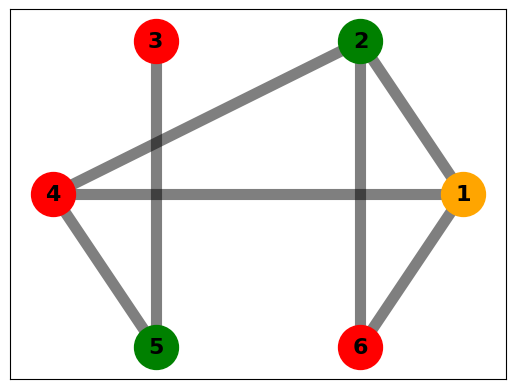

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
import bokeh.palettes # Библиотека со списком цветов


# функция для поиска суммы степеней множества вершин
def SearchVertexPower(list):
    """Получает на вход подмножество вершин в виде списка, возвращает число - сумму степеней вершин

    Parameters
    ---
    list:
        Подмножество вершин в виде списка
    """
    NodesNumber = len(ms[0])
    PowerSum = 0
    for i in list: # i - текущая строка
        for j in range(NodesNumber):
            PowerSum += ms [int(i) - 1] [j] # i-1 - текущая строка
    return PowerSum

ms = [[0, 1, 0, 1, 0, 1],
      [1, 0, 0, 1, 0, 1],
      [0, 0, 0, 0, 1, 0],
      [1, 1, 0, 0, 1, 0],
      [0, 0, 1, 1, 0, 0],
      [1, 1, 0, 0, 0, 0]]


# Список с вершинами, которым нужно присвоить один цвет
# будет получен в результате алгоритма Магу-Вейсмана
SameColorNodes = [[1], [3, 4, 6], [2, 5]]

# Сортировка сначала по длине, потом по сумме степеней
SameColorNodes = sorted(SameColorNodes, reverse = True, key=lambda x: (len(x), SearchVertexPower(x)))
print(SameColorNodes)

# Можно взять уже готовый список цветов
Colors = bokeh.palettes.Category20[20]
# Однако, если цветов нужно больше, или же требуется расположить их в определённом порядке, придётся записать их вручную.
Colors = ["red", "green", "orange", "blue", "yellow", "violet", "purple", "pink", "grey", "magenta"]

G = nx.Graph(np.array(ms))
pos = nx.circular_layout(G)

Labels = {}
for i in G.nodes():
    Labels[i]= i+1

# Для удобства проверки работы алгоритма нумерация была сделана с единицы
# Но, чтобы раскраска работала правильно, необходимо, чтобы она начиналась с нуля
for i in range(len(SameColorNodes)):
    for j in range(len(SameColorNodes[i])):
        SameColorNodes[i][j] = SameColorNodes[i][j]-1

# Каждый новый список вершин рисует новым цветом
for i in range(len(SameColorNodes)):
    nx.draw_networkx_nodes(SameColorNodes[i], pos, node_color=Colors[i], node_size=1000)

nx.draw_networkx_edges(G, pos, width = 8, alpha = 0.5)
nx.draw_networkx_labels(G, pos, Labels, font_size=16, font_weight = 'bold')

plt.savefig("ColoredGraph.png")
plt.show()


Вот, кому интересно, список из 104 цветов, нашёл его тут http://godsnotwheregodsnot.blogspot.com/2012/09/color-distribution-methodology.html.


`colors = ["#A1C299", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059","#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87", "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80", "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100", "#DDEFFF", "#000035", "#7B4F4B", "#000000", "#300018", "#0AA6D8", "#013349", "#00846F", "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09", "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66", "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C", "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81", "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00", "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700", "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329", "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]`

# Лабораторная работа №4 Алгоритм Дейкстры.

## Цель работы

Реализовать алгоритм Дейкстры для нахождения кратчайшего пути от стартовой вершины до всех остальных в ориентированном графе.

Формат ввода: количество вершин, стартовая вершина.

Формат вывода: матрица смежности ориентированного графа, список с расстояниями от стартовой вершины до остальных, рисунок графа.

Если задан орграф $G(V,E)$, в котором дуги нагружены числами (эти числа обычно называют весами, или длинами дуг), то этот граф можно представить в виде матрицы весов (длин) C:

$$C{ij} =
\begin{cases}
0, & \text{для } i = j, \\
c_{ij}, & \text{конечная величина, если есть дуга из узла } i \text{ в узел } j, \\
\infty, & \text{если нет дуги из узла } i \text{ в узел } j.
\end{cases}$$

Длиной пути называется сумма длин дуг, входящих в этот путь. Наиболее часто на практике встречается задача отыскания кратчайшего пути.



## Теория

## Пример создания матрицы весов и вывода ориентированного графа

Дуги и их веса: 
 {(0, 1): np.float64(5.0), (0, 3): np.float64(7.0), (1, 2): np.float64(3.0), (1, 3): np.float64(2.0), (1, 4): np.float64(2.0), (4, 0): np.float64(6.0)}
Матрица весов
[[inf  5. inf  7. inf]
 [inf inf  3.  2.  2.]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [ 6. inf inf inf inf]]


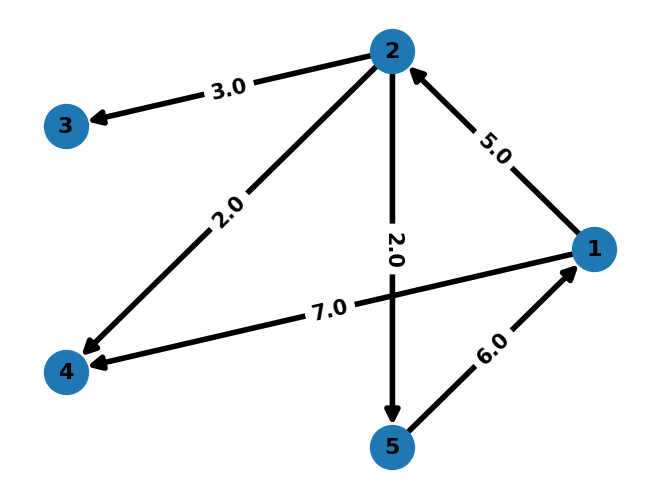

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import random

ms = [[0, 1, 0, 1, 0],
      [0, 0, 1, 1, 1],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [1, 0, 0, 0, 0]]

NodesNumber = 5

# Матрица весов
# Она должна быть float, т.к. этот тип имеет math.inf
mv = np.zeros((NodesNumber, NodesNumber), float)

# заполнение матрицы
weights = dict()
for i in range(NodesNumber):
    for j in range(NodesNumber):
        # Если в матрице смежности есть дуга присваевает ей вес
        if ms[i][j]!= 0:
              mv[i][j] = random.randint(1,10)
              tuple = i, j
              weights[tuple] = mv[i][j]
        else:
          mv[i][j] = math.inf

print("Дуги и их веса: \n", weights)
print("Матрица весов")
print(mv)

G = nx.DiGraph(np.matrix(ms))
pos = nx.circular_layout(G)

nx.draw(G,pos, font_weight = 'bold', node_size = 1000, width = 4,arrowsize = 20, arrowstyle = "-|>")
nx.draw_networkx_labels(G, pos, labels, font_size=16, font_weight = 'bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights, font_size=15, font_weight = 'bold')

plt.show()
